In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [2]:
df=pd.read_csv("PBL5recommendationdata.csv",encoding='iso-8859-1')

In [3]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,...,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E0149 +E0156,1.0,NaN,0.0,NaN,136.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.80,7.50,30.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,NaN,20.00,NaN,9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.99,NaN,fedex,11|Ground,NaN,NaN,NaN,1.28597E+14,3.0,1.386090e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Urinary-Drain-Bags0000,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,Rx,Yes,NaN,NaN,NaN,https://medline360.medline.com:443/irj/servlet...,508f2d75-582e-2e10-2eab-d83980a9b1d0,A4357,1.0,NaN,0.0,OFF sale cause it is an RX item,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,8.00,7.00,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,NaN,68.78,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.73,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.449604e+09,genlee166,authorize.net,NaN,...,NaN,NaN,NaN,NaN,SensiCare-Nitrile-Exam-GlovesBlueXX-Large,0.0,CS,800 Each / Case,NaN,1 CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,800.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.23,10.04,10.24,NaN,NaN,NaN,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437762646,0.0,29,4,James,Anderson,NaN,29,NaN,Ebay,NaN,USD,NaN,19.56,0.0,9.95,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,29.55,NaN,NaN,11|Ground,NaN,NaN,NaN,7.96468E+14,3.0,1.386780e+09,NaN,NaN,Credit Card,...,NaN,NaN,NaN,NaN,Basket-for-2-Butt

In [4]:
df.isnull().sum()

Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.company        3467
Customers.create_date       0
                         ... 
Products.leg_style       4194
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Products.freight_cost    4194
Length: 181, dtype: int64

In [5]:
df.shape

(4194, 181)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [7]:
df.columns

Index(['Customers.id', 'Customers.fname', 'Customers.lname',
       'Customers.company', 'Customers.create_date', 'Customers.status',
       'Customers.mailing', 'Customers.reminders', 'Customers.tax_exempt',
       'Customers.account_id',
       ...
       'Products.google_shopping_label', 'Products.product_option',
       'Products.size', 'Products.material', 'Products.arm_style',
       'Products.leg_style', 'Products.seat_size', 'Products.family_id',
       'Products.saved_status', 'Products.freight_cost'],
      dtype='object', length=181)

In [8]:
df_total_data=pd.DataFrame(df.isnull().sum()) 
df_total_data 
less_data_table=df_total_data[df_total_data[0]>1000] 

In [9]:
for i in less_data_table.index:
    df.drop(i,axis=1,inplace=True)

In [11]:
for i in df.select_dtypes(include=np.object):
    df[i].fillna(df[i].value_counts().sort_values(ascending=False).index[0],inplace=True)

In [12]:
for i in df.select_dtypes(include=np.number):
    df[i].fillna(df[i].mean(),inplace=True)

In [14]:
df.isnull().sum()

Customers.id                     0
Customers.fname                  0
Customers.lname                  0
Customers.create_date            0
Customers.last_modified          0
Customers.customer_type          0
Orders.id                        0
Orders.customer_id               0
Orders.fname                     0
Orders.lname                     0
Orders.order_number              0
Orders.currency                  0
Orders.subtotal                  0
Orders.tax                       0
Orders.shipping                  0
Orders.total                     0
Orders.shipping_carrier          0
Orders.shipping_method           0
Orders.tracking                  0
Orders.payment_status            0
Orders.payment_date              0
Orders.payment_type              0
Orders.payment_amount            0
Orders.payment_id                0
Orders.payment_code              0
Orders.status                    0
Orders.placed_date               0
Orders.updated_date              0
Orders.shipped_date 

In [15]:
df.shape

(4194, 67)

In [16]:
x=pd.get_dummies(df,drop_first=True)

In [18]:
x

,Customers.id,Customers.create_date,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.payment_status,Orders.payment_date,Orders.payment_amount,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.id,Products.status,Products.vendor,Products.import_id,Products.list_price,Products.price,Products.cost,Products.last_modified,Products.shopping_flags,Products.qb_edit_sequence,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.saved_status,Customers.fname_A.J.,Customers.fname_ACCOUNTS,Customers.fname_AKOSSIWA,Customers.fname_ALEEN,Customers.fname_ALFRED,Customers.fname_ALICE,Customers.fname_ALVIN,Customers.fname_ANDREA,Customers.fname_ANDREW,Customers.fname_ANDY R,Customers.fname_ANGELA,Customers.fname_ANITA,...,Products.family_id_WA32,Products.family_id_WA35,Products.family_id_WA37,Products.family_id_WA38,Products.family_id_WA40,Products.family_id_WA42,Products.family_id_WA43,Products.family_id_WC12,Products.family_id_WC13,Products.family_id_WC14,Products.family_id_WC17,Products.family_id_WC2,Products.family_id_WC22,Products.family_id_WC23,Products.family_id_WC24,Products.family_id_WC26,Products.family_id_WC27,Products.family_id_WC38,Products.family_id_WC39,Products.family_id_WC4,Products.family_id_WC40,Products.family_id_WC46,Products.family_id_WC49,Products.family_id_WC50,Products.family_id_WC6,Products.family_id_WZ1,Products.family_id_WZ28,Products.family_id_WZ31,Products.family_id_WZ43,Products.family_id_WZ56,Products.family_id_WZ58,Products.family_id_WZ70,Products.family_id_WZ71,Products.family_id_WZ72,Products.family_id_WZ73,Products.family_id_WZ74,Products.family_id_WZ76,Products.family_id_WZ77,Products.family_id_WZ81,Products.family_id_WZ85,Products.family_id_WZ86,Products.family_id_WZ87,Products.family_id_WZ88,Products.family_id_WZ89,Products.family_id_WZ91,Products.family_id_WZ92,Products.family_id_WZ96,Products.family_id_Wall mat hanger,Products.family_id_the Adjustable CuffÌÄ®ÕÌ¢âÂÁÌÄÛ_Ìâå¨ Variable Weights,Products.family_id_the CuffÌÄ®ÕÌ¢âÂÁÌÄÛ_Ìâå¨ Weights
0,797,1426018724,1437764306,0.000000,3758,797,57.20,0.000000,9.950000,64.29,3.0,1.426019e+09,64.29,1,1426019099,1.438868e+09,1.426101e+09,0.000000,5284,3758,2310.0,1,57.20,44.00,2310.0,0.0,1.0,3.0,80.70,57.64,44.00,1.463163e+09,62.0,1.450325e+09,24.80,7.50,30.40,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,1386089139,1437764354,0.000000,23,3,20.00,0.800838,9.990000,29.99,3.0,1.386090e+09,29.99,1,1386090455,1.440529e+09,1.386103e+09,0.000000,31,23,177.0,4,5.00,1.87,177.0,1.0,1.0,3.0,14.41,10.29,1.87,1.462370e+09,62.0,1.450322e+09,8.00,7.00,1.50,0.876336,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1386089139,1437764354,0.000000,9531,3,68.78,0.000000,9.950000,78.73,3.0,1.449604e+09,78.73,3,1449603652,1.450213e+09,1.442167e+09,0.000000,11655,9531,1.0,1,68.78,52.50,1.0,0.0,1.0,3.0,96.29,68.78,52.50,1.463163e+09,62.0,1.450321e+09,13.23,10.04,10.24,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1386780263,1437762646,0.000000,29,4,19.56,0.000000,9.950000,29.55,3.0,1.386780e+09,29.55,1,1386780263,1.440529e+09,1.386800e+09,0.000000,1816,29,983.0,1,19.56,12.62,983.0,0.0,1.0,3.0,27.38,19.56,12.62,1.462595e+09,62.0,1.450323e+09,10.60,7.80,18.50,0.876336,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1386861599,1437764316,0.000000,30,5,36.05,0.800838,9.950000,46.00,3.0,1.386862e+09,46.00,1,1386861599,1.440529e+09,1.386876e+09,0.000000,40,30,991

In [19]:
model=KMeans(n_clusters=4)

In [20]:
model=model.fit(x)

In [21]:
tahmin=model.predict(x)

In [22]:
tahmin

array([3, 0, 3, ..., 2, 2, 2])

In [23]:
df["cluster"]=tahmin

In [24]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_type,Orders.payment_amount,Orders.payment_id,Orders.payment_code,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.id,Products.status,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.cost,Products.last_modified,Products.shopping_brand,Products.shopping_mpn,Products.shopping_flags,Products.amazon_item_type,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.long_description,Products.seo_title,Products.seo_url,Products.unit,Products.hcpcs,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.family_id,Products.saved_status,cluster
0,797,Christy,Dill,1426018724,1437764306,0.0,3758,797,Christy,Dill,3758,USD,57.20,0.000000,9.95,64.29,fedex,11|Ground,5.7204E+14,3.0,1.426019e+09,authorize.net,64.29,6993607863,510142,1,1426019099,1.438868e+09,1.426101e+09,0.0,5284,3758,2310.0,"Basic Rollators, Green",1,57.20,44.00,2310.0,0.0,sub-product-detail.html,1.0,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",80.70,57.64,44.00,1.463163e+09,MEDLINE,MDS86850EGS,62.0,health-care-products,generic/online%3Aen%3AUS%3A2310,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,8000064C-1434298761,1.450325e+09,"<ul><li> Classically designed, value priced</...","Basic Lightweight Rollators For Adults, With S...",Basic-Rollators-For-Adults-With-Seat-Green-6-W...,EA,E0149 +E0156,24.80,7.50,30.40,PF61071,0.000000,3
1,3,John,Smith,1386089139,1437764354,0.0,23,3,John,Smith,23,USD,20.00,0.800838,9.99,29.99,fedex,11|Ground,1.28597E+14,3.0,1.386090e+09,authorize.net,29.99,0,0,1,1386090455,1.440529e+09,1.386103e+09,0.0,31,23,177.0,"Urinary Drain Bags,0.000",4,5.00,1.87,177.0,1.0,sub-product-detail.html,1.0,3.0,Urinary Drain Bags,Urinary Drain Bags,14.41,10.29,1.87,1.462370e+09,MEDLINE,DYNC1674H,62.0,health-care-products,online:en:US:1842,"Incontinence, Urology & Ostomy > Urology > Dra...",Health & Beauty > Health Care,80008C35-1438901283,1.450322e+09,<ul><li> Only Medline drain bags have a slide...,Urinary Drain Bags | MEDLINE - DYNC1674H,Urinary-Drain-Bags0000,EA,A4357,8.00,7.00,1.50,PF02132,0.876336,0
2,3,John,Smith,1386089139,1437764354,0.0,9531,3,John,Smith,9531,USD,68.78,0.000000,9.95,78.73,manual,0|Standard Shipping,7.96468E+14,3.0,1.449604e+09,authorize.net,78.73,0,0,3,1449603652,1.450213e+09,1.442167e+09,0.0,11655,9531,1.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,68.78,52.50,1.0,0.0,sub-product-detail.html,1.0,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",96.29,68.78,52.50,1.463163e+09,MEDLINE,484805,62.0,health-care-products,generic/online%3Aen%3AUS%3A1,Apparel > Gloves > Nonsterile PF LF Synthetic ...,Health & Beauty > Health Care,800087BB-1438898332,1.450321e+09,<ul><li> SensiCare&reg; nitrile exam gloves fe...,"Nitrile Exam Gloves, Blue, XX-Large | MEDLINE ...",SensiCare-Nitrile-Exam-GlovesBlueXX-Large,CS,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,13.23,10.04,10.24,PF00342,0.000000,3
3,4,James,Anderson,1386780263,1437762646,0.0,29,4,James,Anderson,29,USD,19.56,0.000000,9.95,29.55,fedex,11|Ground,7.96468E+14,3.0,1.386780e+09,authorize.net,29.55,0,02708Z,1,1386780263,1.440529e+09,1.386800e+09,0.0,1816,29,983.0,Basket for 2-Button Walkers,1,19.56,12.62,983.0,0.0,su

In [25]:
silhouette_score(x,tahmin)

0.4923029268935774

In [26]:
allscore=[]
allclusters=[]
kırılma=[]
def clust(kactane):
    
    for i in range(1,kactane+1):
        i=i+1
        model=KMeans(n_clusters=i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        uzaklik=model.inertia_
        print("Cluster ",i," score ",score)
        allscore.append(score)
        allclusters.append(i)
        kırılma.append(uzaklik)
clust(10)

Cluster  2  score  0.6285252292104919
Cluster  3  score  0.5633842460109901
Cluster  4  score  0.4929584689819076
Cluster  5  score  0.48384390448252
Cluster  6  score  0.5024961968627644
Cluster  7  score  0.46197503479080343
Cluster  8  score  0.507898100227129
Cluster  9  score  0.5006751435629545
Cluster  10  score  0.5068841848175114
Cluster  11  score  0.488906750229689


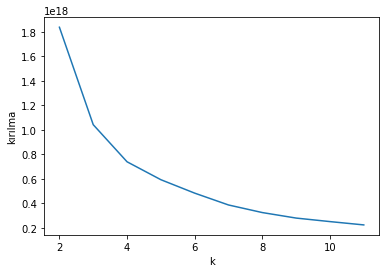

In [27]:
plt.xlabel("k")
plt.ylabel("kırılma")
plt.plot(allclusters,kırılma)

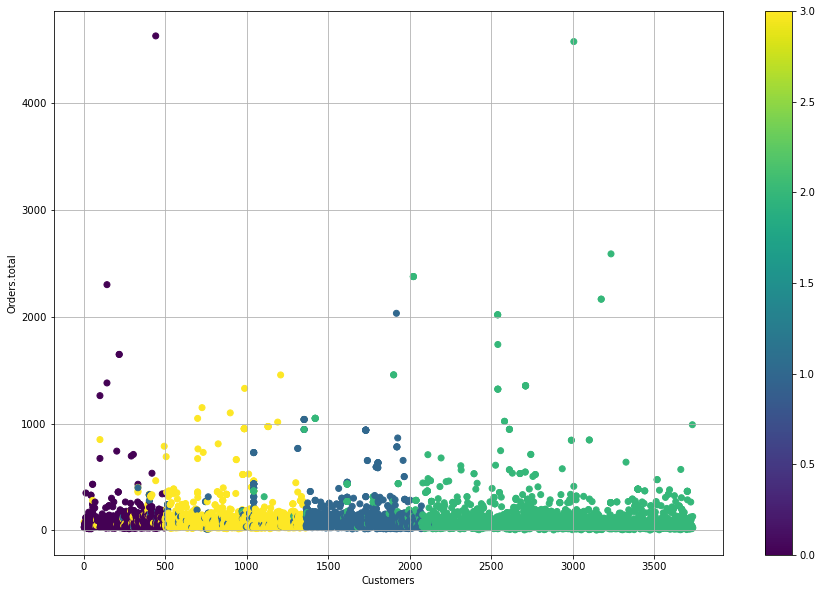

In [29]:
plt.figure(figsize=(15,10))
plt.scatter(df["Customers.id"],y=df["Orders.total"],c=tahmin)
plt.xlabel("Customers")
plt.ylabel("Orders.total")
plt.colorbar()
plt.grid()